# Import Required Libraries

In [1]:
try:
	import numpy as np
	import warnings, cv2, imutils, argparse
	import matplotlib.pyplot as plt
	import skimage.segmentation
	from skimage.feature import peak_local_max
	from scipy import ndimage
	print("----Libraries Loaded----")
except:
    print("----Error Loading Libraries----")

    
# Igonre Warnings
    
DeprecationWarning("ignore")
warnings.filterwarnings("ignore")


----Libraries Loaded----


# Loading and Processing Image

In [2]:
# load the image and perform pyramid mean shift filtering for the thresholding step

image = cv2.imread("Input_image.jpg")
meanshiftedimage = cv2.pyrMeanShiftFiltering(image, 30, 60)

# Display the Input Image
cv2.imshow("Input", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
# Display the Shifted Image

cv2.imshow("Mean-Shifted Image", meanshiftedimage)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
# convert the mean shift image to grayscale, then thresholding

gray = cv2.cvtColor(meanshiftedimage, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU | cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
''' Use cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU, cv2.THRESH_BINARY, and cv2.THRESH_OTSU accordingly in order to get the objects in
    white and background in black.'''

cv2.imshow("Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Applying Watershed Algorithm

In [5]:
''' Computing the exact Euclidean distance from every binary
    pixel to the nearest zero pixel, then finding peaks in this
    distance map'''
Euclidean_Distance = ndimage.distance_transform_edt(thresh)
Peaks = peak_local_max(Euclidean_Distance, indices=False, min_distance=5,labels=thresh)

# Finding Markers using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(Peaks, structure=np.ones((3, 3)))[0]
labels = skimage.segmentation.watershed(-Euclidean_Distance, markers, mask=thresh)
print("Found {} unique segments".format(len(np.unique(labels)) - 1))


Found 24 unique segments


In [6]:
# loop over the unique labels returned by the Watershed algorithm
for label in np.unique(labels):
	# if the label=0, we are checking the 'background' so just ignore it
	if label == 0:
		continue

	# otherwise, allocate memory for the label region and draw it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255

	# detect contours in the mask and grab the biggest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	# draw a shape(circle) enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 255), 2)
	cv2.putText(image, "~{}".format(label), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)



# show the Resultant image
image  = cv2.resize(image, (600, 500))
cv2.imshow("Resultant image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Displaying Results

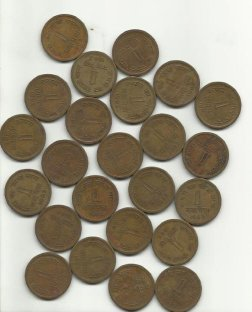

In [7]:
#Showing Input Image

from IPython.display import Image
Image(filename='Input_image.jpg')

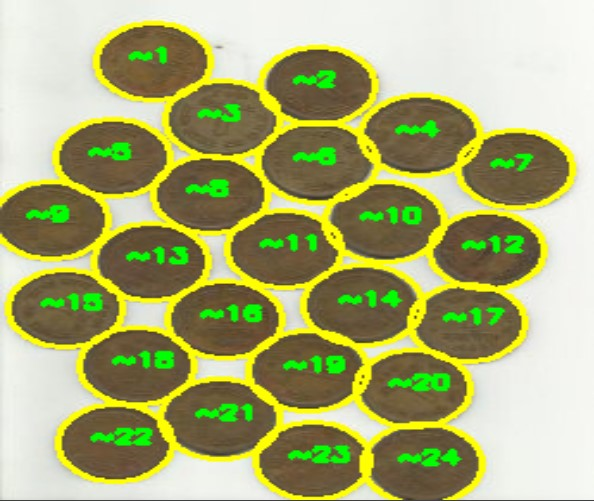

In [8]:
#Showing Output Image

from IPython.display import Image
Image(filename='Resultant_image.jpg')